# **Problem Statement**

- Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. 
- They source fresh produce from farmers and deliver them to businesses within 12 hours. 
- An integral component of their automation process is the `development of robust classifiers which can distinguish between images of different types of vegetables`, while also `correctly labeling images that do not contain any one type of vegetable as noise.`



- As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes. 
- We have been tasked with preparing a multiclass classifier for identifying these vegetables. The dataset provided has all the required images to achieve the task.



## Context

- This dataset contains images of the following food items: noise-Indian market and images of vegetables- onion, potato and tomato.

## Data Collection

- The images in this dataset were scraped from Google.

## Content

- This dataset contains a folder train, which has a total of 3135 images, split into four folders as follows:

  - Tomato : 789

  - Potato : 898

  - Onion : 849

  - Indian market : 599

- This dataset contains another folder test which has a total of 351 images, split into four folders

  - Tomato : 106

  - potato : 83

  - onion : 81

  - Indian market : 81

## **Objective :** 

- The objective is to develop a program that can recognize the vegetable item(s) in a photo and identify them for the user.

### **Concepts Tested**:

- Dataset Preparation & Visualization

- CNN models

- Implementing Callbacks

- Deal with Overfitting

- Transfer Learning

# Downloading Data

In [1]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From (uriginal): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=81a1e38b-e333-4bec-acfc-46f3f6e959a5
To: /Users/aryan/Documents/GitHub/Neutral-Networks/Business Case Study/ninjacart_data.zip
100%|████████████████████████████████████████| 275M/275M [01:04<00:00, 4.29MB/s]


# Unzip

In [7]:
%%time 

!unzip -q ninjacart_data.zip

CPU times: user 12 ms, sys: 9.29 ms, total: 21.2 ms
Wall time: 2.04 s


# Importing libraries

In [3]:
%%time

import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

CPU times: user 2.12 s, sys: 763 ms, total: 2.88 s
Wall time: 19 s


In [4]:
# Train data distribution

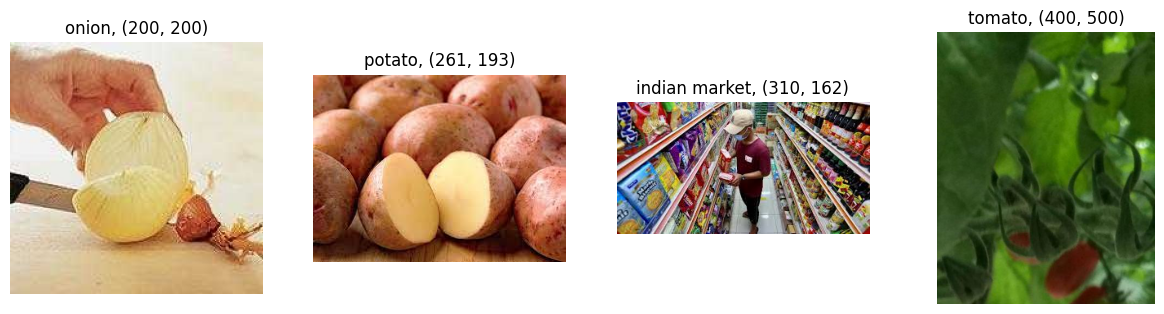

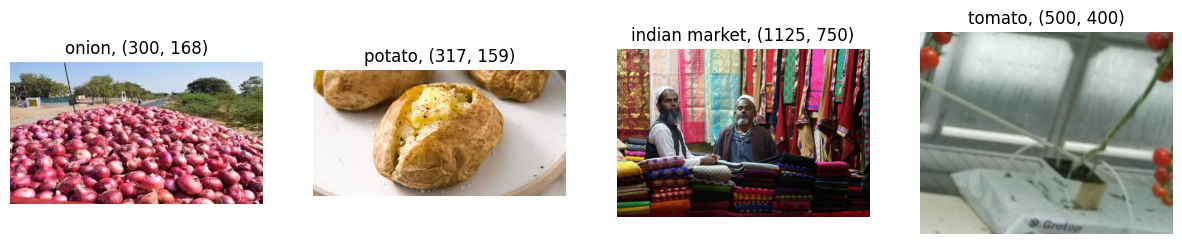

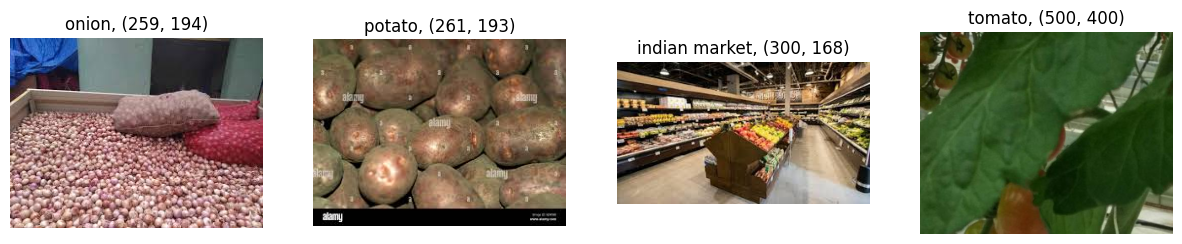

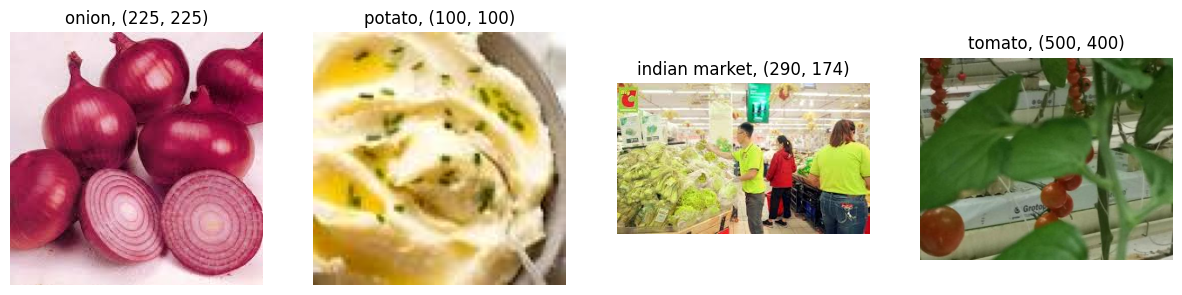

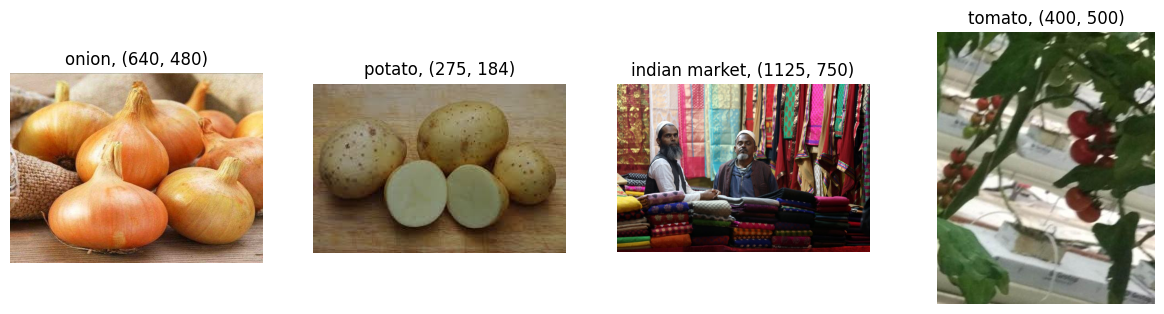




Count of training samples per class:
            class  count
0          onion    849
1         potato    898
2  indian market    599
3         tomato    789



CPU times: user 1.09 s, sys: 58.4 ms, total: 1.15 s
Wall time: 1.16 s


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

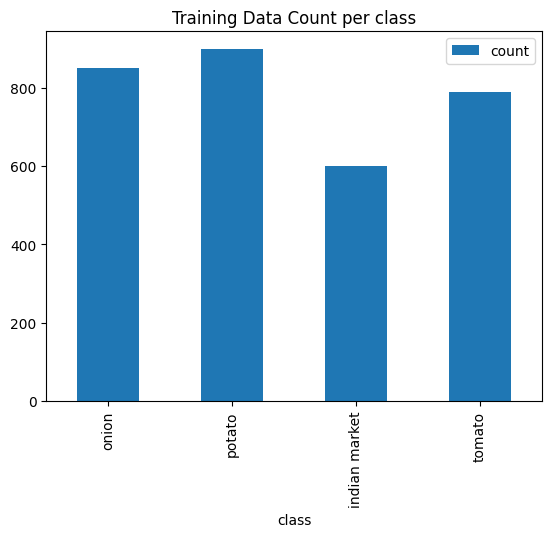

In [8]:
%%time 

class_dirs_train = os.listdir("ninjacart_data/train") # list all directories inside "train" folder
image_dict_train = {} # dict to store image array(key) for every class(value)
count_dict_train = {} # dict to store count of files(key) for every class(value)

for _ in range(5):
  # iterate over all class_dirs
  for cls in class_dirs_train:
      # get list of all paths inside the subdirectory
      file_paths = glob.glob(f'ninjacart_data/train/{cls}/*')
      # count number of files in each class and add it to count_dict_train
      count_dict_train[cls] = len(file_paths)
      # select random item from list of image paths
      image_path = random.choice(file_paths)
      # load image using keras utility function and save it in image_dict_train
      image_dict_train[cls] = tf.keras.utils.load_img(image_path)
    
  ## Viz Random Sample from each class

  plt.figure(figsize=(15, 12))
  # iterate over dictionary items (class label, image array)
  for i, (cls,img) in enumerate(image_dict_train.items()):    
      # create a subplot axis
      ax = plt.subplot(3, 4, i + 1)
      # plot each image
      plt.imshow(img)
      # set "class name" along with "image size" as title 
      plt.title(f'{cls}, {img.size}')
      plt.axis("off")

  plt.show()

  ## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict_train.keys(),     # keys of count_dict are class labels
    "count": count_dict_train.values(),   # value of count_dict contain counts of each class
})

print()
print()
print()

print("Count of training samples per class:\n", df_count_train)

print()
print()
print()

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class") 

# test data distribution

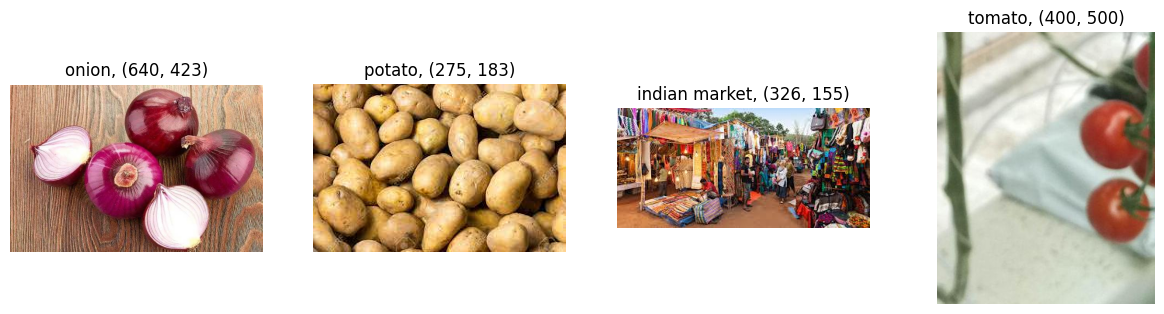

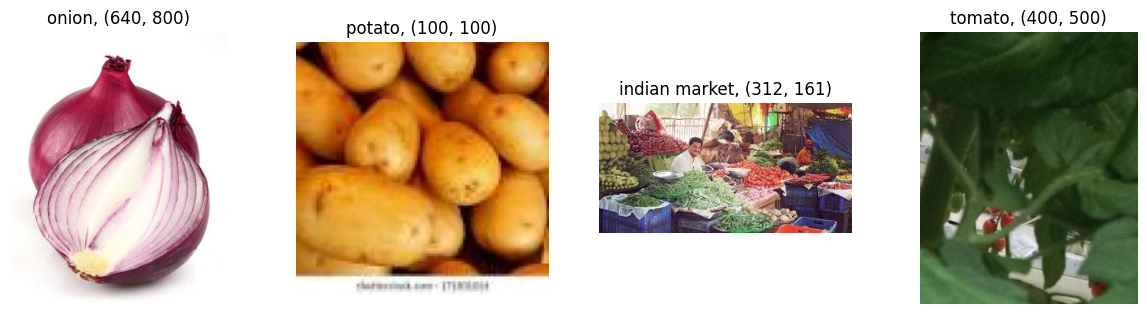

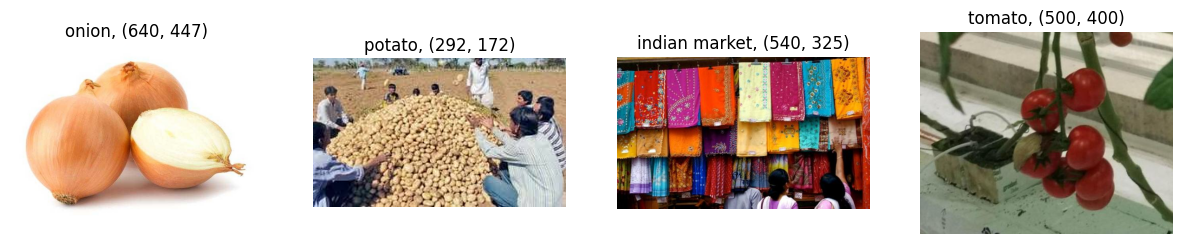

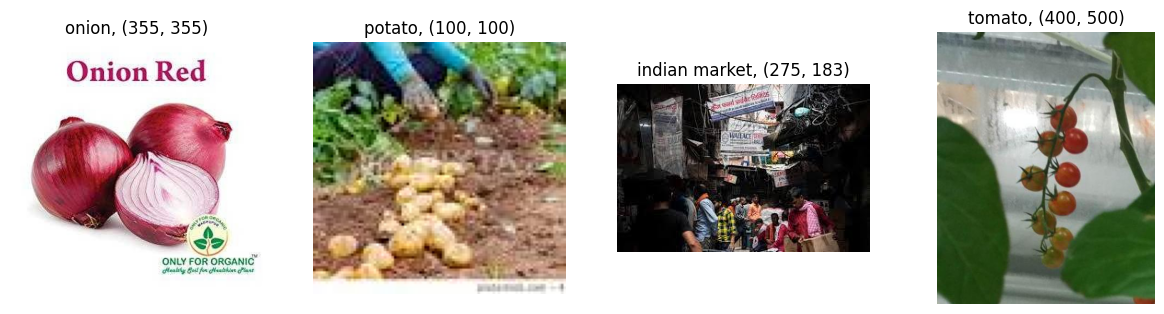

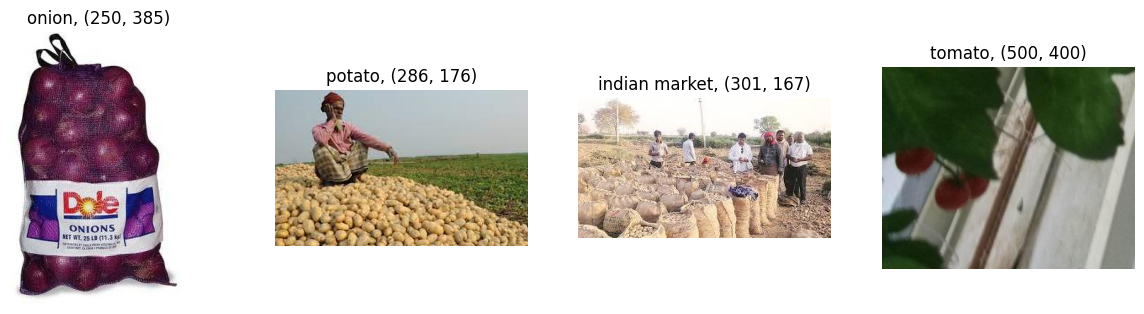




Count of test samples per class:
            class  count
0          onion     83
1         potato     81
2  indian market     81
3         tomato    106



CPU times: user 930 ms, sys: 32.7 ms, total: 963 ms
Wall time: 967 ms


<Axes: title={'center': 'test Data Count per class'}, xlabel='class'>

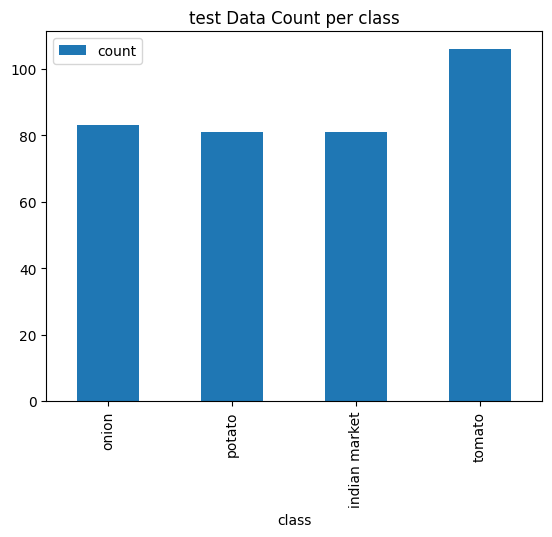

In [9]:

%%time


class_dirs_test = os.listdir("ninjacart_data/test") # list all directories inside "train" folder
image_dict_test = {} # dict to store image array(key) for every class(value)
count_dict_test = {} # dict to store count of files(key) for every class(value)

for _ in range(5):
  # iterate over all class_dirs_test
  for cls in class_dirs_test:
      # get list of all paths inside the subdirectory
      file_paths = glob.glob(f'ninjacart_data/test/{cls}/*')
      # count number of files in each class and add it to count_dict_test
      count_dict_test[cls] = len(file_paths)
      # select random item from list of image paths
      image_path = random.choice(file_paths)
      # load image using keras utility function and save it in image_dict
      image_dict_test[cls] = tf.keras.utils.load_img(image_path)
    
  ## Viz Random Sample from each class

  plt.figure(figsize=(15, 12))
  # iterate over dictionary items (class label, image array)
  for i, (cls,img) in enumerate(image_dict_test.items()):    
      # create a subplot axis
      ax = plt.subplot(3, 4, i + 1)
      # plot each image
      plt.imshow(img)
      # set "class name" along with "image size" as title 
      plt.title(f'{cls}, {img.size}')
      plt.axis("off")

  plt.show()

## Let's now Plot the Data Distribution of testing Data across Classes
df_count_test = pd.DataFrame({
    "class": count_dict_test.keys(),     # keys of count_dict are class labels
    "count": count_dict_test.values(),   # value of count_dict contain counts of each class
})

print()
print()
print()
print("Count of test samples per class:\n", df_count_test)

print()
print()
print()

# draw a bar plot using pandas in-built plotting function
df_count_test.plot.bar(x='class', y='count', title="test Data Count per class") 

# Loading, Resizing the data into TensorFlow

In [10]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


In [17]:
train_dir = 'ninjacart_data/train'
test_dir = 'ninjacart_data/test'

train_filenames = tf.io.gfile.glob(train_dir + '/*/*')
test_filenames = tf.io.gfile.glob(test_dir + '/*/*')

train_labels = [os.path.basename(os.path.dirname(filename)) for filename in train_filenames]
test_labels = [os.path.basename(os.path.dirname(filename)) for filename in test_filenames]

In [19]:
np.unique(np.array(test_labels))

array(['indian market', 'onion', 'potato', 'tomato'], dtype='<U13')

In [20]:
train_filenames, val_filenames, train_labels, val_labels = train_test_split(train_filenames, train_labels, test_size=0.2)


In [21]:
data_dir = 'ninjacart_data/train'
img_size = (128, 128) # set the desired image size for your model

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values
    validation_split=0.2 # set the validation split to 20%
)

train_data = train_data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32, # set the batch size for training data
    class_mode='categorical',
    subset='training'
)

val_data = train_data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32, # set the batch size for validation data
    class_mode='categorical',
    subset='validation'
)

Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


In [23]:
data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



test_data = data_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)

Found 351 images belonging to 4 classes.


In [24]:
height, width = img_size
height, width

(128, 128)

In [25]:
# Creating base ANN model:

# ANN Model

In [26]:
num_classes = 4
hidden_size_1 = 256
hidden_size_2 = 256


model = keras.Sequential(
    name="model_ANN",
    layers=[
        
        

        layers.Flatten(input_shape=(height, width, 3)),
        
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        

        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

model.summary()



Model: "model_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 12,649,988
Trainable params: 12,649,988
Non-trainable params: 0
_________________________________________________________________


In [28]:
#tf.keras.utils.plot_model(model, to_file="model_ANN.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:

epochs = 15
model_fit = model.fit(train_data,
                      steps_per_epoch=train_data.samples//train_data.batch_size, # set the steps per epoch
                      validation_data=val_data,
                      validation_steps=val_data.samples//val_data.batch_size, # set the validation steps
                      epochs=epochs)



Epoch 1/15


2023-04-14 21:43:11.301499: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


78/78 [==============================] - 9s 114ms/step - loss: 5.1779 - accuracy: 0.4445 - val_loss: 1.4665 - val_accuracy: 0.5510
Epoch 2/15
78/78 [==============================] - 9s 111ms/step - loss: 1.0330 - accuracy: 0.6301 - val_loss: 1.2690 - val_accuracy: 0.5740
Epoch 3/15
78/78 [==============================] - 9s 111ms/step - loss: 1.1153 - accuracy: 0.6216 - val_loss: 1.4648 - val_accuracy: 0.4737
Epoch 4/15
78/78 [==============================] - 9s 112ms/step - loss: 0.8917 - accuracy: 0.6720 - val_loss: 1.0467 - val_accuracy: 0.6053
Epoch 5/15
78/78 [==============================] - 9s 112ms/step - loss: 0.8002 - accuracy: 0.6866 - val_loss: 1.1542 - val_accuracy: 0.5477
Epoch 6/15
78/78 [==============================] - 9s 111ms/step - loss: 0.6896 - accuracy: 0.7342 - val_loss: 0.9172 - val_accuracy: 0.6546
Epoch 7/15
78/78 [==============================] - 9s 111ms/step - loss: 0.6967 - accuracy: 0.7366 - val_loss: 0.9077 - val_accuracy: 0.6464
Epoch 8/15
78/78 

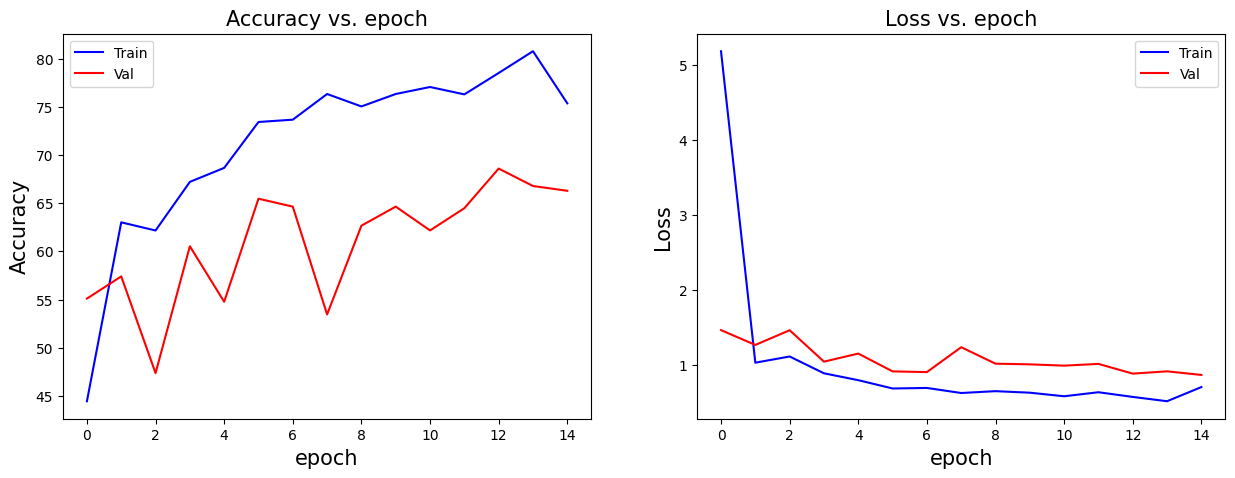

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

11/11 [==============================] - 1s 101ms/step - loss: 0.9910 - accuracy: 0.5897
Test accuracy: 0.5897436141967773


11/11 [==============================] - 1s 96ms/step
Confusion matrix:
[[23 29 27  2]
 [ 4 41 36  2]
 [ 7 17 57  0]
 [14  3  3 86]]
Classification report:
               precision    recall  f1-score   support

indian market       0.48      0.28      0.36        81
        onion       0.46      0.49      0.47        83
       potato       0.46      0.70      0.56        81
       tomato       0.96      0.81      0.88       106

     accuracy                           0.59       351
    macro avg       0.59      0.57      0.57       351
 weighted avg       0.61      0.59      0.59       351







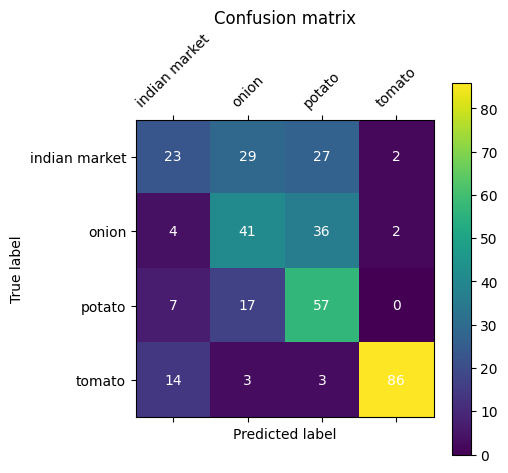

In [32]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

# CNN

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential(
    
    name="model_CNN",
    layers = [
    

    Conv2D(filters = 32,
           kernel_size = (3, 3),
           activation='relu',
           padding="same" ,
           input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64,
           (3, 3),
           padding="same" ,
           activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(128, 
           (3, 3),
           padding="same",
           activation='relu'),
    MaxPooling2D((2, 2)),

    
    Flatten(),


    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])




In [40]:
import pydot

In [42]:
tf.keras.utils.plot_model(model, to_file="model_CNN.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
model.summary()

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0 

In [44]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model_fit = model.fit(
    train_data,
    steps_per_epoch=train_data.samples//train_data.batch_size, # set the steps per epoch
    validation_data=val_data,
    validation_steps=val_data.samples//val_data.batch_size, # set the validation steps
    epochs=10 # set the number of epochs
)


Epoch 1/10
78/78 [==============================] - 13s 166ms/step - loss: 0.8706 - accuracy: 0.6301 - val_loss: 0.5778 - val_accuracy: 0.7516
Epoch 2/10
78/78 [==============================] - 13s 161ms/step - loss: 0.4522 - accuracy: 0.8322 - val_loss: 0.4859 - val_accuracy: 0.8059
Epoch 3/10
78/78 [==============================] - 13s 162ms/step - loss: 0.3597 - accuracy: 0.8584 - val_loss: 0.4397 - val_accuracy: 0.8322
Epoch 4/10
78/78 [==============================] - 13s 162ms/step - loss: 0.3352 - accuracy: 0.8729 - val_loss: 0.4230 - val_accuracy: 0.8438
Epoch 5/10
78/78 [==============================] - 13s 160ms/step - loss: 0.2675 - accuracy: 0.9008 - val_loss: 0.4131 - val_accuracy: 0.8520
Epoch 6/10
78/78 [==============================] - 13s 162ms/step - loss: 0.2191 - accuracy: 0.9201 - val_loss: 0.3755 - val_accuracy: 0.8586
Epoch 7/10
78/78 [==============================] - 13s 163ms/step - loss: 0.1598 - accuracy: 0.9403 - val_loss: 0.7721 - val_accuracy: 0.7615

11/11 [==============================] - 1s 112ms/step - loss: 0.9561 - accuracy: 0.7892
Test accuracy: 0.7891737818717957


11/11 [==============================] - 1s 112ms/step
Confusion matrix:
[[ 52  23   6   0]
 [  2  57  24   0]
 [  7  11  63   0]
 [  0   0   1 105]]
Classification report:
               precision    recall  f1-score   support

indian market       0.85      0.64      0.73        81
        onion       0.63      0.69      0.66        83
       potato       0.67      0.78      0.72        81
       tomato       1.00      0.99      1.00       106

     accuracy                           0.79       351
    macro avg       0.79      0.77      0.78       351
 weighted avg       0.80      0.79      0.79       351







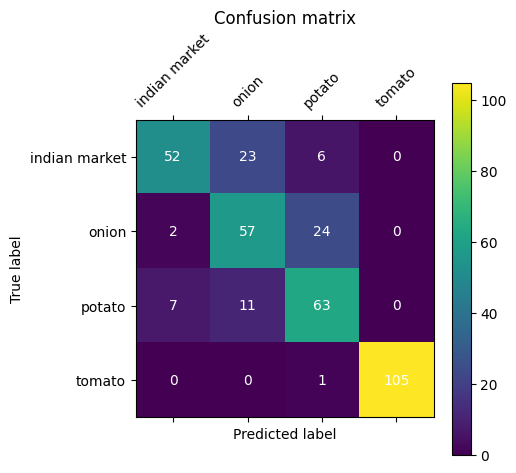

In [46]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

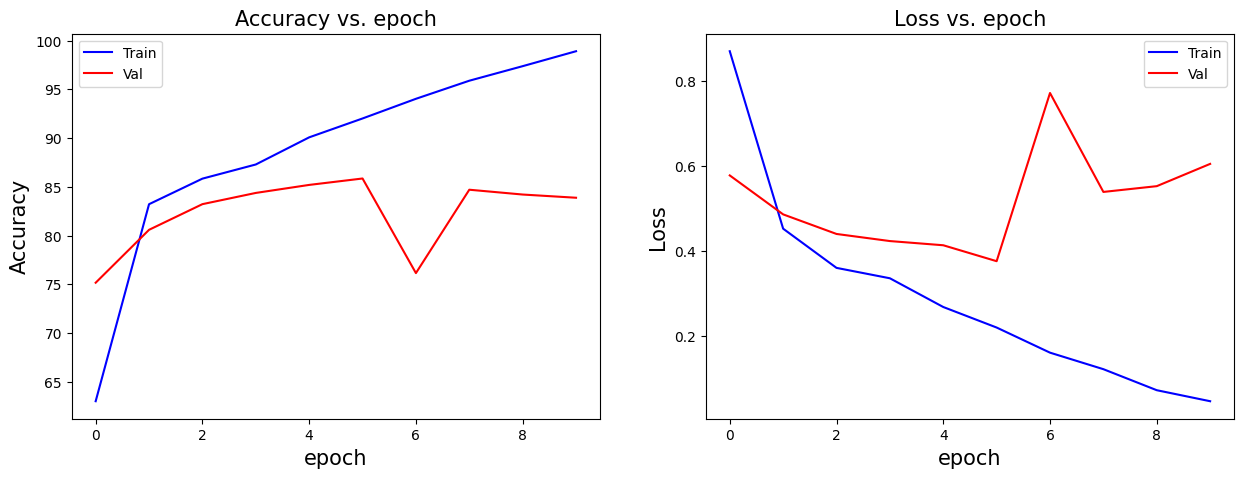

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [2]:
import os
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(111)
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [49]:
# helper function to annotate maximum values in the plots
def annot_max(x,y, xytext=(0.94,0.96), ax=None, only_y=True):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    if only_y:
        text = "{:.2f}%".format(ymax)
    else:
        text= "x={:.2f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

def plot_accuracy(model_fit):
    #accuracy graph
    x = range(0,len(model_fit.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()
    

# CNN architecture 2:

In [50]:
def architecture_2(height=128, width=128,num_classes=4):
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_3",
        layers=[
            layers.Conv2D(filters=16, 
                          kernel_size=3, 
                          padding="same", 
                          input_shape=(height, width, 3),
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [51]:
model = architecture_2()
model.summary()

Model: "model_cnn_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        

In [52]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [53]:
model_fit = compile_train_v2(model, train_data, val_data, epochs=100)

Epoch 1/100
79/79 [==============================] - 12s 141ms/step - loss: 1.4593 - accuracy: 0.7109 - val_loss: 2.5782 - val_accuracy: 0.2516 - lr: 0.0010
Epoch 2/100
79/79 [==============================] - 11s 140ms/step - loss: 1.1665 - accuracy: 0.7857 - val_loss: 1.7917 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 3/100
79/79 [==============================] - 11s 138ms/step - loss: 1.0595 - accuracy: 0.8216 - val_loss: 2.7067 - val_accuracy: 0.2949 - lr: 0.0010
Epoch 4/100
79/79 [==============================] - 11s 137ms/step - loss: 0.9952 - accuracy: 0.8295 - val_loss: 2.7039 - val_accuracy: 0.3894 - lr: 0.0010
Epoch 5/100
79/79 [==============================] - 11s 137ms/step - loss: 0.9231 - accuracy: 0.8331 - val_loss: 1.7627 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 6/100
79/79 [==============================] - 11s 136ms/step - loss: 0.8487 - accuracy: 0.8578 - val_loss: 1.1586 - val_accuracy: 0.7228 - lr: 0.0010
Epoch 7/100
79/79 [==============================] - 11s 1

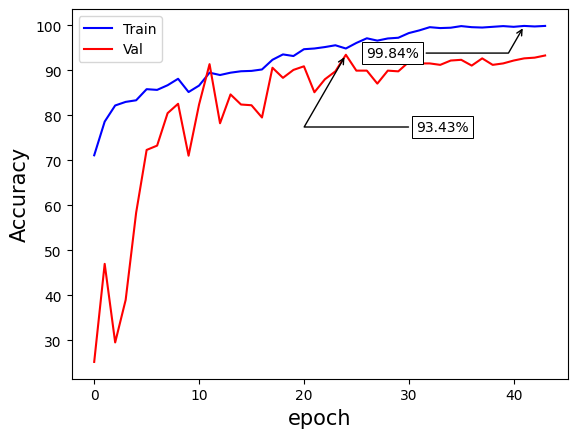

In [54]:
plot_accuracy(model_fit)

11/11 [==============================] - 1s 106ms/step - loss: 0.6210 - accuracy: 0.8803
Test accuracy: 0.8803418874740601


11/11 [==============================] - 1s 108ms/step
Confusion matrix:
[[ 69   8   4   0]
 [  3  66  14   0]
 [  2  11  68   0]
 [  0   0   0 106]]
Classification report:
               precision    recall  f1-score   support

indian market       0.93      0.85      0.89        81
        onion       0.78      0.80      0.79        83
       potato       0.79      0.84      0.81        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.88       351
    macro avg       0.87      0.87      0.87       351
 weighted avg       0.88      0.88      0.88       351







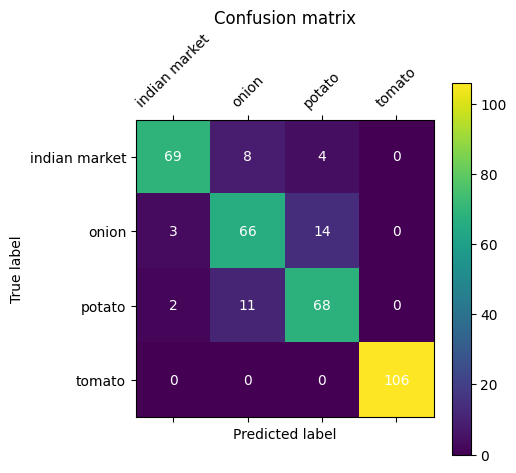

In [55]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

Functions:

In [56]:
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
  ax = axes.ravel()

  #accuracy graph
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0, n_epochs), model_history.history['loss'], label='Train', color='b')
  ax[1].plot(range(0, n_epochs), model_history.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  #display the graph
  plt.show()


def conf_mat(class_path, pred_list, model_name) :
    noise, tomato, potato, onion = 0, 0, 0, 0
    for i in os.listdir(class_path):

        img = tf.keras.utils.load_img(class_path + "/" + str(i))
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (256, 256))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img)
        predicted = tf.argmax(pred, 1).numpy().item()

        if predicted == 0:
            noise+= 1
        elif predicted == 1:
            onion+= 1
        elif predicted == 2:
            potato+= 1
        else:
            tomato+= 1  


    for item in noise, onion, potato, tomato :
        pred_list.append(item)

# Preproccessing

In [4]:
train_dir = 'ninjacart_data/train'
test_dir = 'ninjacart_data/test'

In [5]:
# Specifying the image size to resize all images
image_size = (256, 256)

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                       validation_split = 0.2,
                                                       subset = "training",
                                                       shuffle=True)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                      )

Found 351 files belonging to 4 classes.


In [8]:
valid_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                       validation_split = 0.2,
                                                       subset = "validation")

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [9]:
class_names = ['indian market', 'onion', 'potato', 'tomato']

In [10]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor = 0.2, width_factor=0.2)
])

aug_ds = train_ds 

for image, label in aug_ds :
  image = augmentation(image)

2023-04-14 22:28:57.559243: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


: 

: 